In [1]:
# 导入所需的模块
import requests
from bs4 import BeautifulSoup
import pandas as pd


# 获取网页信息
def get_html(url):
    html = ''
    try:
        r = requests.get(url,timeout = 10)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        print('爬取网页异常！')
    
    
# 保存有效信息
def get_message(info_list, html):
    try:
        name_list = []
        area_list = []
        price_list = []
        soup = BeautifulSoup(html,'html.parser')
        for area in soup.findAll('div',attrs = {'class':'resblock-location'}):
            a = area.find('span').string
            area_list.append(a)
        for price in soup.findAll('div',attrs = {'class':'main-price'}):
            p = price.find('span').string
            price_list.append(p)
        for i in range(len(area_list)):
            info_list.append([area_list[i],price_list[i]])
        return info_list
    except:
        print('error')


# 定义起始网页和爬取页面总数
num = 20
url = 'https://xa.fang.lianjia.com/loupan/pg'

# 保存有效信息
info_list = []

# 获取每个页面上的信息
for i in range(num):
    # 实时打印进度
    print(str(i+1)+'/'+str(num))
    
    # 当前网页
    url = url + str(i+1)
    
    # 获取网页信息
    html = get_html(url)

    # 保存有效信息
    info_list = get_message(info_list, html)

# 保存信息至文件
file_name = '1.csv'
headers = ['地区', '价格']
data = pd.DataFrame(info_list, columns=headers)
data.to_csv(file_name)
print('保存成功！')




1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20
保存成功！


In [3]:
# 导入所需的模块
import pandas as pd

# 读取csv
df = pd.read_csv('1.csv')

# 去除价格待定的样本
df = df[df['价格'] != '价格待定']

# 计算每个地区的房价
num_yt = 0
price_yt = 0
num_ca = 0
price_ca = 0
num_qd = 0
price_qd = 0
num_bq = 0
price_bq = 0
num_mx = 0
price_mx = 0
num_wy = 0
price_wy = 0
num_xc = 0
price_xc = 0
num_bl = 0
price_bl = 0
for item in df.values:
    if item[1] == '雁塔':
        price_yt += int(item[2])
        num_yt += 1
    elif item[1] == '长安':
        price_ca += int(item[2])
        num_ca += 1
    elif item[1] == '秦都区':
        price_qd += int(item[2])
        num_qd += 1
    elif item[1] == '灞桥':
        price_bq += int(item[2])
        num_bq += 1
    elif item[1] == '眉县':
        price_mx += int(item[2])
        num_mx += 1
    elif item[1] == '未央':
        price_wy += int(item[2])
        num_wy += 1
    elif item[1] == '新城区':
        price_xc += int(item[2])
        num_xc += 1
    elif item[1] == '碑林':
        price_bl += int(item[2])
        num_bl += 1
price_yt = round(price_yt/num_yt, 1)
price_ca = round(price_ca/num_ca, 1)
price_qd = round(price_qd/num_qd, 1)
price_bq = round(price_bq/num_bq, 1)
price_mx = round(price_mx/num_mx, 1)
price_wy = round(price_wy/num_wy, 1)
price_xc = round(price_xc/num_xc, 1)
price_bl = round(price_bl/num_bl, 1)

# 保存数据
dict1 = {'yt': price_yt, 'ca': price_ca, 'qd': price_qd, 'bq': price_bq, 'mx': price_mx, 'wy': price_wy, 'xc': price_xc, 'bl': price_bl}

print(dict1)

{'yt': 15718.6, 'ca': 14000.0, 'qd': 9200.0, 'bq': 10478.3, 'mx': 12000.0, 'wy': 11000.0, 'xc': 12000.0, 'bl': 12202.5}


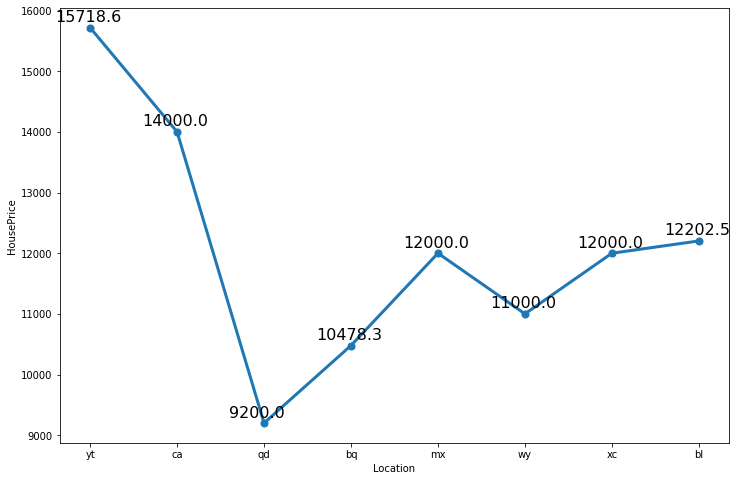

In [4]:
# 导入所需的模块
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 创建窗口
plt.figure(figsize=(12, 8))

# 绘制图像
plt.plot(dict1.keys(), dict1.values(), linewidth=3)
plt.scatter(dict1.keys(), dict1.values(), s=50)

# 设置坐标轴名称
plt.xlabel('Location')
plt.ylabel('HousePrice')

# 显示具体价格
for x, y in zip(range(len(dict1.keys())), dict1.values()):
    plt.text(x-0.4, y+100, y, fontdict={'size': 16, 'color': 'k'})

# 保存图像
plt.savefig('1.jpg')

# 显示图像
plt.show()